In [67]:
# libraries
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import itertools 
import json as js

path = "./Brightkite_totalCheckins.txt"


def permutation(list):
    res_list = []
    for e in list:
        for el in list:
            if e != el:
                res_list.append((e,el))
    return res_list

def merge_two_dicts(x, y):
    z = x.copy()   # start with keys and values of x
    z.update(y)    # modifies z with keys and values of y
    return z



In [52]:
#get the datas
with open(path) as f:
    raw_datas = f.read()
    first_elaboration = raw_datas.split("\n")

act_datas_time={}
for d in first_elaboration:
    if(d!=''):
        tmp = d.split("\t")
        if tmp[1][0:13] in act_datas_time.keys():
            #act_datas[tmp[4]].append((tmp[0],tmp[1]))
            act_datas_time[tmp[1][0:13]].append((tmp[0], tmp[4], (tmp[2], tmp[3])))
        else:
            #act_datas[tmp[4]] = [(tmp[0],tmp[1])]
            act_datas_time[tmp[1][0:13]] = [(tmp[0], tmp[4], (tmp[2], tmp[3]))]

In [53]:
G_time = nx.Graph()
nodes = act_datas_time.keys()
G_time.add_nodes_from(act_datas_time.keys())
#for k in nodes:
#    G.add_edges_from(act_datas[k])

In [54]:
time_graph = {}

for t in act_datas_time:
    pos_time = act_datas_time[t]
    loc_graph = {}
    
    for elem in pos_time:
        if elem[1] in loc_graph.keys():
            loc_graph[elem[1]].append(elem[0])
        else:
            loc_graph[elem[1]] = [elem[0]]
    time_graph[t] = loc_graph



In [55]:
all_graph = {}

for t in time_graph:
        pos_time = time_graph[t]
        G_tmp = nx.Graph()
        for pos in pos_time:
                node_list = pos_time[pos]
                G_tmp.add_nodes_from(node_list)
                if len(node_list)>1:
                        edges_tmp = permutation(node_list)
                        G_tmp.add_edges_from(edges_tmp)
        all_graph[t] = G_tmp



In [56]:
reduced_graph = {}

month_list=[]
i = 0
j = 0
k = 0
for t in time_graph:
    if(t!=''):
        j+=1
        month = int(t[5:7])
        month_list.append(month)
        if t[0:4] == "2009" and month<6:
            k+=1
            reduced_graph[t] = time_graph[t]
    i+=1

print("Selezionati: "+str(k))
print("Effettivi: "+str(j))
print("Totali: "+str(i))



Selezionati: 3624
Effettivi: 22050
Totali: 22051


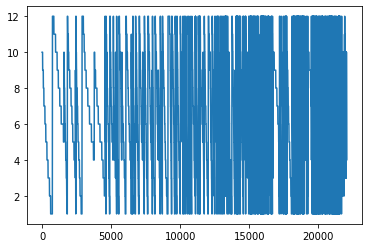

22050

In [57]:
plt.plot(month_list)
plt.show()   
len(month_list)

In [58]:
times = list(reduced_graph.keys())

times.sort()



pos_to_remove = []
base = merge_two_dicts(reduced_graph[times[0]], reduced_graph[times[1]])

lengths = []
i = 0
for pos in base:
    if len(base[pos])==1:
        pos_to_remove.append(pos)
    else:
        i+=1
print("Base: "+str(len(base.keys())))
print("to remove: "+str(len(pos_to_remove)))

Base: 711
to remove: 589


In [50]:
postime_reduced_graph = {}
i = 0
for time in reduced_graph:
    act_graph = reduced_graph[time]

    survived_pos = {}
    for pos in act_graph:
        if pos not in pos_to_remove:
            survived_pos[pos] = act_graph[pos]
        else:
            i +=1
    postime_reduced_graph[time] = survived_pos
print("Scartati: "+str(i))
print("Dimensione: "+ str(len(postime_reduced_graph)))


Scartati: 43602
Dimensione: 3624


In [59]:
Gtot = nx.Graph()

for t in postime_reduced_graph:
        pos_time = postime_reduced_graph[t]
        for pos in pos_time:
                node_list = pos_time[pos]
                Gtot.add_nodes_from(node_list)
                if len(node_list)>1:
                        edges_tmp = permutation(node_list)
                        Gtot.add_edges_from(edges_tmp, time=t, position=pos)
        


In [60]:
print("Numero di nodi: "+str(Gtot.number_of_nodes()))
print("Numero di archi: "+str(Gtot.number_of_edges()))
print("Il grafo è connesso? "+str(nx.is_connected(Gtot)))
print("Componenti connesse: "+ str(nx.number_connected_components(Gtot)))
nx.info(Gtot)


Numero di nodi: 24568
Numero di archi: 19898
Il grafo è connesso? False
Componenti connesse: 18082


/tmp/ipykernel_50389/2924902066.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(Gtot)


'Graph with 24568 nodes and 19898 edges'

In [61]:
Gcc = sorted(nx.connected_components(Gtot), key=len, reverse=True)

g = Gtot.subgraph(Gcc[0])
print("Numero di nodi: "+str(g.number_of_nodes()))
print("Numero di archi: "+str(g.number_of_edges()))
print("Il grafo è connesso? "+str(nx.is_connected(g)))
print("Componenti connesse: "+ str(nx.number_connected_components(g)))
#nx.info(Gtot)

lista_componenti_connesse = list(nx.connected_components(Gtot))
print(len(lista_componenti_connesse[1]))


Numero di nodi: 5538
Numero di archi: 18764
Il grafo è connesso? True
Componenti connesse: 1
1


In [69]:
json = nx.node_link_data(Gtot)
json.keys()


links = json["links"]

with open("links.json", "w") as f:
    for l in links:
        row = l["source"]+","+l["target"]+","+l["time"]+","+l["position"]+"\n"
        f.write(row)
    f.close()

with open("all_datas.json", "w") as ff:
    string_to_print = js.dumps(json)
    ff.write(string_to_print)
    ff.close()